# Energie in Nederland

Het voorbeeld voor de eindopdracht kun je hier openen:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1GeTnXnZ__4cE5fPF_I3Gczj6cM2AC-2L?usp=sharing)

Lever het resultaat als *.ipynb* bestand in via eJournal. Dit doe je door de volgende stappen te volgen nadat je klaar bent:

File > Download > Download .ipynb

## Zorgen dat je Google Drive te vinden is door Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/electricity_dataset/Electricity

/content/drive/MyDrive/electricity_dataset/Electricity


## Installeren en importeren van de nodige libraries

In [3]:
!pip install geopandas
!pip3 install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 28.3 MB/s eta 0:00:00


In [4]:
# Importeer de nodige libraries.
import pandas as pd
import os

from matplotlib.patches import Polygon as polg
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import geopandas as gpd
from matplotlib.patches import Patch
from shapely.geometry import Point, Polygon
from geopandas import GeoDataFrame

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
from matplotlib import gridspec
import seaborn as sns
from mpl_toolkits.basemap import Basemap

## De dataset van 2020 bekijken

In [5]:
# Maakt een leeg dataframe.
df_electricity = pd.DataFrame()

# Vult dit dataframe met de elektriciteitsdata uit 2020.
df_electricity = pd.read_csv('coteq_electricity_2020.csv')

# Laat de eerste 5 items uit het dataset zien.
df_electricity.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,Dorpsstraat,7468CP,7471AA,ENTER,19,89,95,89,1x35,3810,89,89
1,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AB,7471AB,GOOR,40,100,98,78,1x35,2637,95,83
2,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AC,7471AC,GOOR,16,100,100,100,1x35,1366,100,94
3,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AD,7471AE,GOOR,41,93,85,54,3x25,5101,93,78
4,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,Kerkstraat,7471AG,7471AG,GOOR,14,86,100,36,1x25,4315,100,93


## Een kaart van Nederland maken

In [6]:
# Importeert geografische data van Nederland
geo_nederland = gpd.read_file('../../geo_files/gadm41_NLD_2.shp')

# Laat de eerste 5 items uit het dataset zien.
geo_nederland.head()

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,NLD.1.1_1,NLD,Netherlands,NLD.1_1,Drenthe,NA,Aa en Hunze,NA,NA,Gemeente,Municipality,NA,NL.DR.AH,"POLYGON ((6.56990 52.94651, 6.57448 52.95006, ..."
1,NLD.1.2_1,NLD,Netherlands,NLD.1_1,Drenthe,NA,Assen,NA,NA,Gemeente,Municipality,NA,NL.DR.AS,"POLYGON ((6.64079 53.02571, 6.63922 53.02304, ..."
2,NLD.1.3_1,NLD,Netherlands,NLD.1_1,Drenthe,NA,Borger-Odoorn,NA,NA,Gemeente,Municipality,NA,NL.DR.BO,"POLYGON ((6.74567 52.87925, 6.74431 52.88375, ..."
3,NLD.1.4_1,NLD,Netherlands,NLD.1_1,Drenthe,NA,Coevorden,NA,NA,Gemeente,Municipality,NA,NL.DR.CO,"POLYGON ((6.87156 52.65302, 6.87122 52.65298, ..."
4,NLD.1.5_1,NLD,Netherlands,NLD.1_1,Drenthe,NA,De Wolden,NA,NA,Gemeente,Municipality,NA,NL.DR.DW,"POLYGON ((6.27322 52.66813, 6.27347 52.66819, ..."


<ipython-input-7-4680a575df04>:25: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  prov_list.append(polg(np.array(shape), True) )


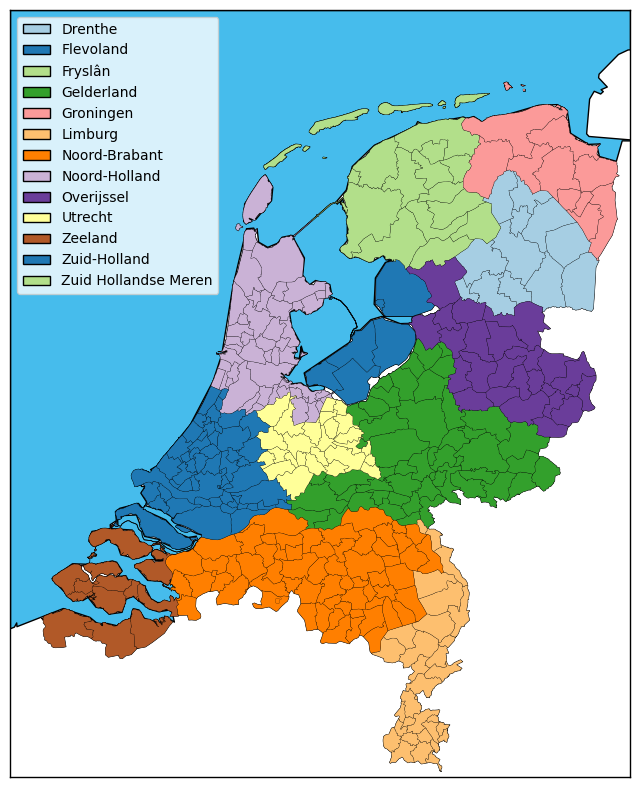

In [7]:
# Maakt een plot aan.
f, ax = plt.subplots(figsize = (8,12))

# Maakt een map aan.
m = Basemap(resolution='i',
            projection='merc',
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=3.15, llcrnrlat= 50.7, urcrnrlon=7.3, urcrnrlat=53.84, ax=ax)
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#ffffff',lake_color='#3792cb')
# Voegt de juiste vormen toe voor een kaart van Nederland.
m.readshapefile('../../geo_files/gadm41_NLD_2','geometry')
m.drawcoastlines()

legenda = []
gemeentes = geo_nederland.NAME_1.unique()
kleuren = sns.color_palette('Paired',len(gemeentes))
prov_kleur = dict(zip(gemeentes,kleuren))
# Zorgt ervoor dat elke gemeente binnen de provincie dezelfde kleur heeft.
for gemeente in gemeentes:
    prov_list = []
    for info, shape in zip(m.geometry_info, m.geometry):
        # Deze shapes moeten blauw worden, want dit zijn wateren.
        if (gemeente not in ['Zeeuwse meren','IJsselmeer', 'Zuid Hollandse Meren']) & (info['NAME_1'] == gemeente):
            prov_list.append(polg(np.array(shape), True) )
    ax.add_collection(PatchCollection(prov_list, facecolor= prov_kleur[gemeente], edgecolor='black', linewidths=.15, zorder=2))
    if gemeente not in ['Zeeuwse meren','IJsselmeer']:
        legenda.append(Patch(facecolor=prov_kleur[gemeente], edgecolor='black',
                         label=gemeente))
ax.legend(handles=legenda)

## Bestanden inladen in een dataframe

In [8]:
def laad_bestanden(map,bestandenlijst):
  '''
  Deze functie laadt csv bestanden in uit een map en maakt hier een dataframe van.
  Het resultarende dataframe is de combinatie van de data uit de verschillende csv-bestanden.
  '''
  df = None
  # Maakt een initieel dataframe van de meegegeven bestanden.
  for bestand in bestandenlijst:
      jaar = bestand[-8:-4]
      bedrijf = bestand.split('_')[0]
      if df is None:
          df = pd.read_csv(map+bestand)
          df['year'] = jaar
          df.index = bedrijf + '_' + jaar+'_' + df.index.astype(str)
      else:
          temp = pd.read_csv(map+bestand)
          print(map+bestand)
          temp['year'] = jaar
          temp.index = bedrijf + '_' + jaar+'_' + temp.index.astype(str)
          df = pd.concat([df, temp])
  df.fillna(0)

  # Voegt nog een aantal extra kolommen toe aan het eerder gemaakte dataframe.
  df['laag_tarief_consumptie'] = df['annual_consume'].multiply(df['annual_consume_lowtarif_perc']/100)
  df['actieve_aansluitingen'] = df['num_connections'].multiply(df['perc_of_active_connections']/100).astype('int', errors='ignore')
  try:
      df['aantal_smartmeters'] = df['num_connections'].multiply(df['smartmeter_perc']/100).astype(int)
  except ValueError:
      df['aantal_smartmeters'] = df['num_connections'].multiply(df['smartmeter_perc']/100)
  df['netto_jaarlijkse_consumtie'] = df['annual_consume'].multiply(df['delivery_perc']/100)
  df['eigen_productie'] = df['annual_consume'] - df['netto_jaarlijkse_consumtie']
  df['percentage_eigen_productie'] = df['eigen_productie'].divide(df['annual_consume']/100)

  return(df)

map = '../Electricity/'
alle_bestanden = [bestand for bestand in os.listdir(map)]
alle_jaren_elec = laad_bestanden(map,alle_bestanden)

../Electricity/coteq_electricity_2013.csv
../Electricity/coteq_electricity_2015.csv
../Electricity/coteq_electricity_2018.csv
../Electricity/enexis_electricity_01012011.csv
../Electricity/coteq_electricity_2017.csv
../Electricity/enexis_electricity_01012010.csv
../Electricity/enduriselectricity_01012014.csv
../Electricity/endinet_electricity_01012016.csv
../Electricity/endinet_electricity_01012013.csv
../Electricity/enduriselectricity_01012016.csv
../Electricity/coteq_electricity_2020.csv
../Electricity/endinet_electricity_01012012.csv
../Electricity/enduriselectricity_01012019.csv
../Electricity/enduriselectricity_01012015.csv
../Electricity/coteq_electricity_2019.csv
../Electricity/coteq_electricity_2016.csv
../Electricity/endinet_electricity_01012015.csv
../Electricity/endinet_electricity_01012011.csv
../Electricity/enduriselectricity_01012017.csv
../Electricity/endinet_electricity_01012014.csv
../Electricity/enduriselectricity_01012013.csv
../Electricity/enduriselectricity_01012018

In [9]:
# Laat de eerste 5 items zien uit het dataframe met de elektriciteitsdata uit Nederland van 2010-2020.
alle_jaren_elec.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,...,year,ï»¿NETBEHEERDER,%Defintieve aansl (NRM),STANDAARDDEVIATIE,laag_tarief_consumptie,actieve_aansluitingen,aantal_smartmeters,netto_jaarlijkse_consumtie,eigen_productie,percentage_eigen_productie
coteq_2014_0,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Dorpsstraat,7468CP,7471AA,ENTER,19.0,89.47,94.74,89.0,...,2014,NaN,NaN,NaN,3687.9534,18.0006,0.0,3687.9534,434.0466,10.53
coteq_2014_1,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AB,7471AB,GOOR,37.0,100.00,100.00,86.0,...,2014,NaN,NaN,NaN,1702.6200,37.0000,0.0,1800.0000,0.0000,0.00
coteq_2014_2,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AC,7471AC,GOOR,16.0,100.00,100.00,100.0,...,2014,NaN,NaN,NaN,1315.0000,16.0000,0.0,1315.0000,0.0000,0.00
coteq_2014_3,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AD,7471AE,GOOR,25.0,92.00,84.00,44.0,...,2014,NaN,NaN,NaN,5868.6800,21.0000,0.0,5868.6800,510.3200,8.00
coteq_2014_4,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Kerkstraat,7471AG,7471AG,GOOR,14.0,85.71,100.00,36.0,...,2014,NaN,NaN,NaN,4089.5544,14.0000,0.0,3774.6684,629.3316,14.29


## Samenvoegen van de geologische data met de data betreft het electrischiteitsverbruik in Nederland

In [10]:
# Maakt integers van de postcode's.
alle_jaren_elec['zipcode_from_int'] = alle_jaren_elec['zipcode_from'].str[:-2].astype(int)
alle_jaren_elec['zipcode_to_int'] = alle_jaren_elec['zipcode_to'].str[:-2].astype(int)
#alle_jaren_elec['zidiff'] = alle_jaren_elec['zipcode_to_int'] - alle_jaren_elec['zipcode_from_int']

# Verdelen van kolommen in kolommen met percentages, en kolommen met aantallen.
sumcols = ['annual_consume','num_connections','laag_tarief_consumptie','actieve_aansluitingen','aantal_smartmeters','netto_jaarlijkse_consumtie','eigen_productie']
meancols = ['annual_consume_lowtarif_perc','delivery_perc','perc_of_active_connections','smartmeter_perc','percentage_eigen_productie']

# Voegt de provider toe aan elk item in het dataset.
alle_jaren_elec['provider'] = [f[0] for f in alle_jaren_elec.index.str.split('_')]

# De geografische data per postcode.
postalcode_geoloc = pd.read_csv('../../geo_files/4pp.csv').set_index('postcode',drop=False)

alle_jaren_elec.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,...,STANDAARDDEVIATIE,laag_tarief_consumptie,actieve_aansluitingen,aantal_smartmeters,netto_jaarlijkse_consumtie,eigen_productie,percentage_eigen_productie,zipcode_from_int,zipcode_to_int,provider
coteq_2014_0,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Dorpsstraat,7468CP,7471AA,ENTER,19.0,89.47,94.74,89.0,...,NaN,3687.9534,18.0006,0.0,3687.9534,434.0466,10.53,7468,7471,coteq
coteq_2014_1,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AB,7471AB,GOOR,37.0,100.00,100.00,86.0,...,NaN,1702.6200,37.0000,0.0,1800.0000,0.0000,0.00,7471,7471,coteq
coteq_2014_2,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AC,7471AC,GOOR,16.0,100.00,100.00,100.0,...,NaN,1315.0000,16.0000,0.0,1315.0000,0.0000,0.00,7471,7471,coteq
coteq_2014_3,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AD,7471AE,GOOR,25.0,92.00,84.00,44.0,...,NaN,5868.6800,21.0000,0.0,5868.6800,510.3200,8.00,7471,7471,coteq
coteq_2014_4,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Kerkstraat,7471AG,7471AG,GOOR,14.0,85.71,100.00,36.0,...,NaN,4089.5544,14.0000,0.0,3774.6684,629.3316,14.29,7471,7471,coteq


In [11]:
def groeperen_postcode(year,df):
  '''
  Deze functie groepeert data op basis van de postcode voor een specifiek jaar.
  De output is een dataframe met data voor één jaar.
  '''
  df = df[df.year==year]
  pc_df = df.groupby('zipcode_from_int').sum()[sumcols]#.count()['city']
  pc_df = pc_df.join(df.groupby('zipcode_from_int').mean()[meancols])
  pc_df = pc_df.join(df.groupby('zipcode_from_int').count()['city']).rename({'city':'code_count'},axis=1)
  pc_df = pc_df.join(df.groupby('zipcode_from_int').first()[['city','provider']])
  values = [year+'_'+f for f in pc_df.columns]
  pc_df.rename(dict(zip(pc_df.columns,values)),axis=1,inplace=True)
  pc_df = pc_df.join(postalcode_geoloc,how='left')

  geometry = [Point(xy) for xy in zip(pc_df.longitude, pc_df.latitude)]
  crs = {'init': 'epsg:4326'}
  gdf = GeoDataFrame(pc_df, crs=crs, geometry=geometry)
  pc_df = gemeente_toevoegen(pc_df,gdf)
  return pc_df

def gemeente_toevoegen(df,geodf):
  '''
  Deze functie voegt de gemeente ID en de naam van de gemeente toe aan een bestaand dataframe.
  '''
  for gemeente in geo_nederland.GID_2:
      idx = geo_nederland[geo_nederland.GID_2==gemeente].index[0]
      gemeente_naam = geo_nederland.loc[idx,'NAME_2']
      ingroup = list(geodf[geodf['geometry'].within(geo_nederland.loc[idx,'geometry'])==True].index)
      df.loc[ingroup,'GID_2'] = gemeente
      df.loc[ingroup,'NAME_2'] = gemeente_naam
  return(df)

def data_samenvoegen(df,year):
  '''
  Deze functie resulteert in een dataframe met de data gegroupeerd per gemeente en een dataframe gegroupeerd per polygon vorm voor één specifiek jaar.
  '''
  pc_df = groeperen_postcode(year,df)
  firstcols = ['NAME_2','provincie','netnummer',year+'_provider']
  meancols_y = [year+'_'+f for f in meancols]
  sumcols_y = [year+'_'+f for f in sumcols]
  sumcols_y.append(year+'_code_count')
  final_frame = pc_df.groupby('GID_2').first()[firstcols]
  final_frame['GID_2'] = final_frame.index
  final_frame = final_frame.join(pc_df.groupby('GID_2').mean()[meancols_y])
  final_frame = final_frame.join(pc_df.groupby('GID_2').sum()[sumcols_y])
  polygon_frame = pd.DataFrame({
      'shapes': [polg(np.array(shape),True) for shape in m.geometry],
      'GID_2': [area['GID_2'] for area in m.geometry_info]})

  polygon_frame.reset_index(drop = True, inplace = True)
  final_frame.reset_index(drop = True, inplace = True)

  polygon_frame = polygon_frame.merge(final_frame, on='GID_2', how='left')
  return final_frame, polygon_frame

## Verbruik van Elektriciteit in een scatterplot

<ipython-input-11-b55a2740247a>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pc_df = df.groupby('zipcode_from_int').sum()[sumcols]#.count()['city']
<ipython-input-11-b55a2740247a>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pc_df = pc_df.join(df.groupby('zipcode_from_int').mean()[meancols])
/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-chan

Text(0.5, 1.0, 'Consumptie elektriciteit in 2020')

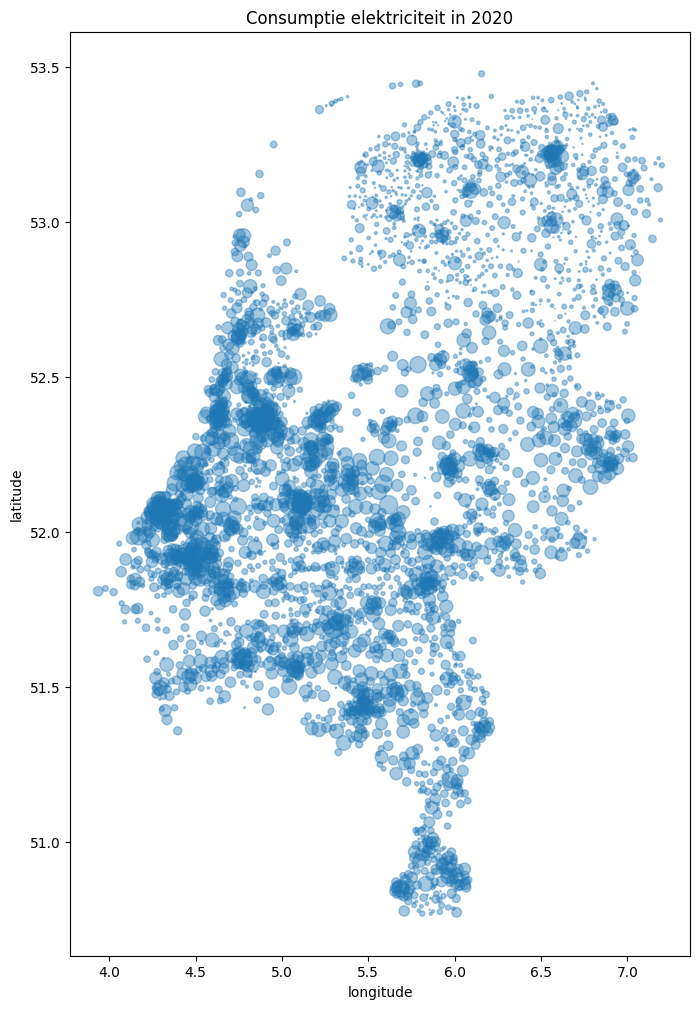

In [12]:
# Alle informatie voor 2020.
pc_2020 = groeperen_postcode('2020',alle_jaren_elec)

# Plotten van de actieve aansluitingen in 2020
f,ax = plt.subplots(figsize=(8,12))
pc_2020.plot.scatter('longitude','latitude',s=pc_2020['2020_netto_jaarlijkse_consumtie'].astype(float).divide(100e2)
                    ,alpha=.4,ax=ax)
plt.title('Consumptie elektriciteit in 2020')

## Opsplitsen van de data in per vorm en per gemeente in Nederland

In [13]:
# Een lijst met alle jaren.
jaren = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
alle_jaren_samengevoegd = {}

# Alle jaren samenvoegen in een dictionary en opsplitsen in verbruik per gemeente en verbruik per polygon vorm.
for jaar in jaren:
  verbruik_gemeente, verbruik_vorm = data_samenvoegen(alle_jaren_elec, jaar)
  alle_jaren_samengevoegd[jaar] = [verbruik_gemeente, verbruik_vorm]

<ipython-input-11-b55a2740247a>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pc_df = df.groupby('zipcode_from_int').sum()[sumcols]#.count()['city']
<ipython-input-11-b55a2740247a>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pc_df = pc_df.join(df.groupby('zipcode_from_int').mean()[meancols])
/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-chan

## Verbruik van elektriciteit in Nederland per gemeente

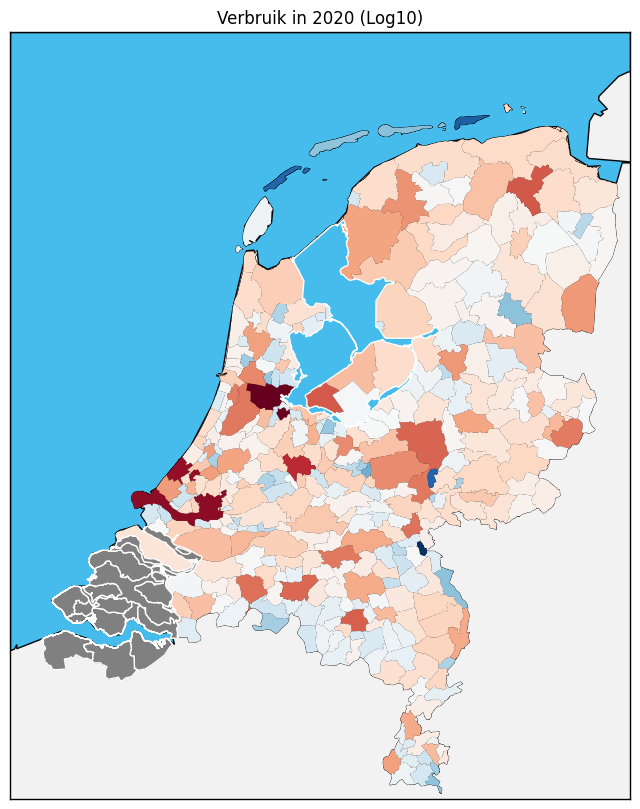

In [14]:
# Kaart van Nederland opstellen
f,ax = plt.subplots(figsize=(8,12))
m = Basemap(resolution='i', # c, l, i, h, f or None (courseness)
            projection='merc',
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=3.15, llcrnrlat= 50.7, urcrnrlon=7.3, urcrnrlat=53.84, ax=ax)
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.readshapefile('../../geo_files/gadm41_NLD_2','geometry')
m.drawcoastlines()

# Alle data uit 2020 "provincie" een waarde heeft. In dit geval wanneer de polygon een gemeente is.
pc2 = alle_jaren_samengevoegd['2020'][1][~alle_jaren_samengevoegd['2020'][1]['provincie'].isna()]
pcna = alle_jaren_samengevoegd['2020'][1][alle_jaren_samengevoegd['2020'][1]['provincie'].isna()]
pcij = alle_jaren_samengevoegd['2020'][1][(alle_jaren_samengevoegd['2020'][1].GID_2=="NLD.6_1")|(alle_jaren_samengevoegd['2020'][1].GID_2=="NLD.6.1_1")]

norm = Normalize()
cmap = plt.get_cmap('RdBu_r')
pc = PatchCollection(pc2.shapes,zorder=2)
pna2 = PatchCollection(pcna.shapes, zorder=2)
pij2 = PatchCollection(pcij.shapes, zorder=2)

# De kleuren van de gemeentes veranderen op basis van de consumptie van elektriciteit in die gemeente.
pc.set_facecolor(cmap(norm(np.log10(pc2['2020_annual_consume'].values))))
pna2.set_facecolor('gray')
pij2.set_facecolor('#46bcec')

pna2.set_edgecolor('white')
pij2.set_edgecolor('white')

ax.add_collection(pc)
ax.add_collection(pna2)
ax.add_collection(pij2)
ax.set_title('Verbruik in 2020 (Log10)')
mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(alle_jaren_samengevoegd['2020'][1]['2020_annual_consume'])

## Een barplot van de eigen productie per gemeente.

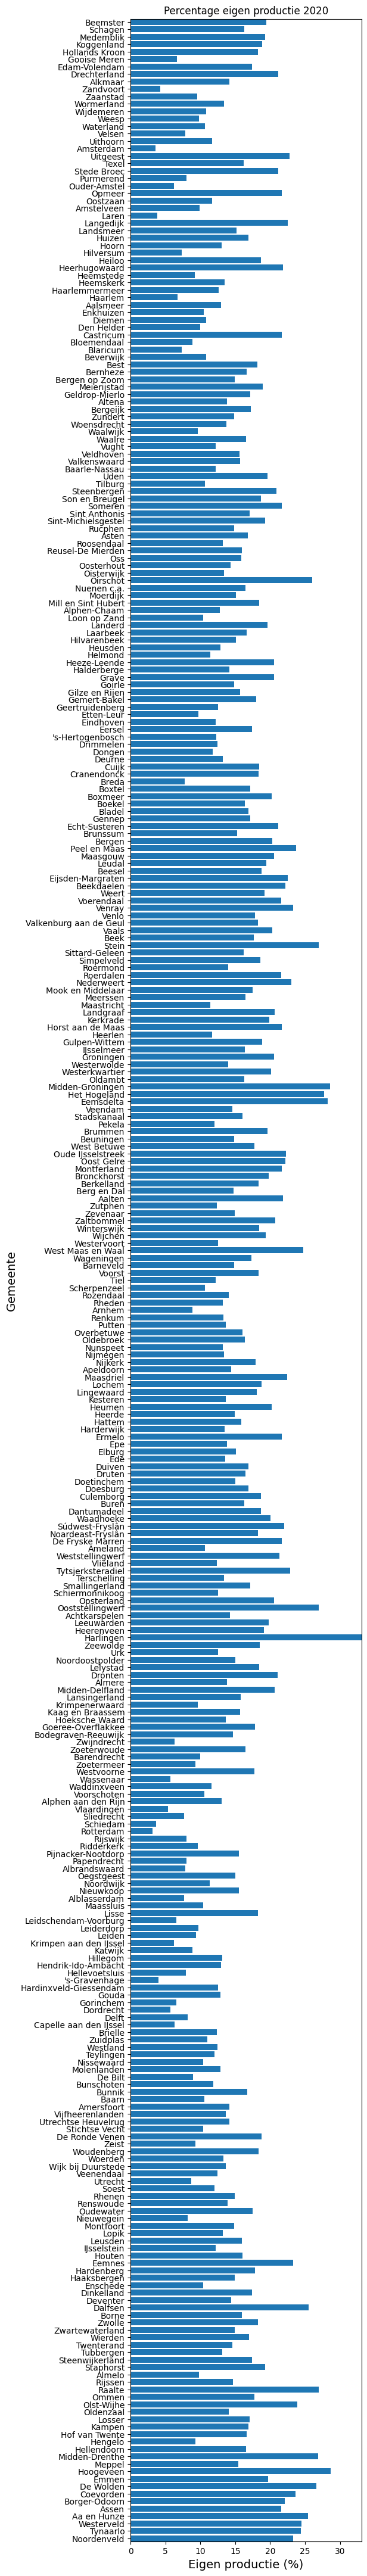

In [15]:
# Een barplot van het percentage elektriciteit wat zelf geproduceerd wordt per gemeente.
fig = plt.figure(figsize=(5,55))
plt.barh(alle_jaren_samengevoegd['2020'][0]['NAME_2'], alle_jaren_samengevoegd['2020'][0]['2020_percentage_eigen_productie'])
plt.title('Percentage eigen productie 2020')
plt.xlabel('Eigen productie (%)', fontsize=14)
plt.ylabel('Gemeente', fontsize=14)
plt.margins(0)
plt.show()

## Met dezelfde data kunnen we dit ook indelen per provincie

<Axes: title={'center': 'Percentage eigen productie per provincie 2020'}, xlabel='provincie', ylabel='Percentage (%)'>

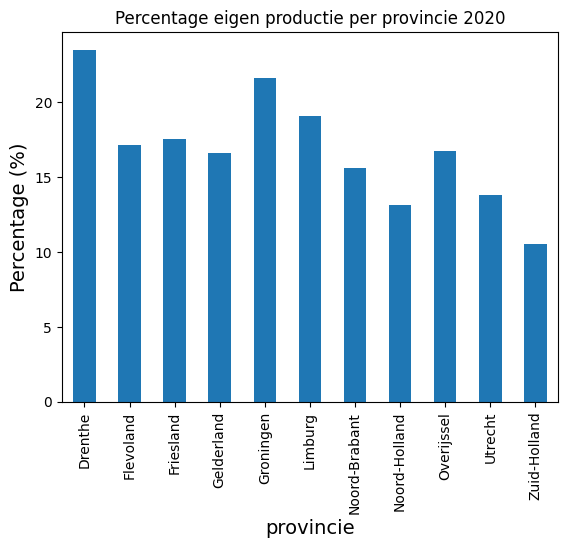

In [16]:
prov_prod = alle_jaren_samengevoegd['2020'][1].groupby(['provincie'])['2020_percentage_eigen_productie'].mean()
plt.title('Percentage eigen productie per provincie 2020')
plt.xlabel('provincie', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
prov_prod.plot.bar()

## Eens kijken of we over de tijd heen het aantal smartmeters kunnen bekijken

In [31]:
excludecols = ['shapes', 'GID_2', 'NAME_2', 'provincie', 'netnummer']
jaren = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
combineddf = pd.DataFrame()

# Data van de verschillende jaren samenvoegen voor het verbruik per vorm (of polygon).
for jaar in jaren:
  if jaar == '2011':
    incols = [f for f in alle_jaren_samengevoegd['2011'][1].columns if f not in excludecols]
    combineddf = alle_jaren_samengevoegd['2018'][1].join(alle_jaren_samengevoegd['2011'][1][incols],how='left')
  elif jaar != '2018':
    incols = [jaar+f[4:] for f in incols]
    combineddf = combineddf.join(alle_jaren_samengevoegd[jaar][1][incols],how='left')

<ipython-input-32-c12ddfc1858d>:45: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(mapper, shrink=0.4)
<ipython-input-32-c12ddfc1858d>:45: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(mapper, shrink=0.4)
<ipython-input-32-c12ddfc1858d>:45: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* 

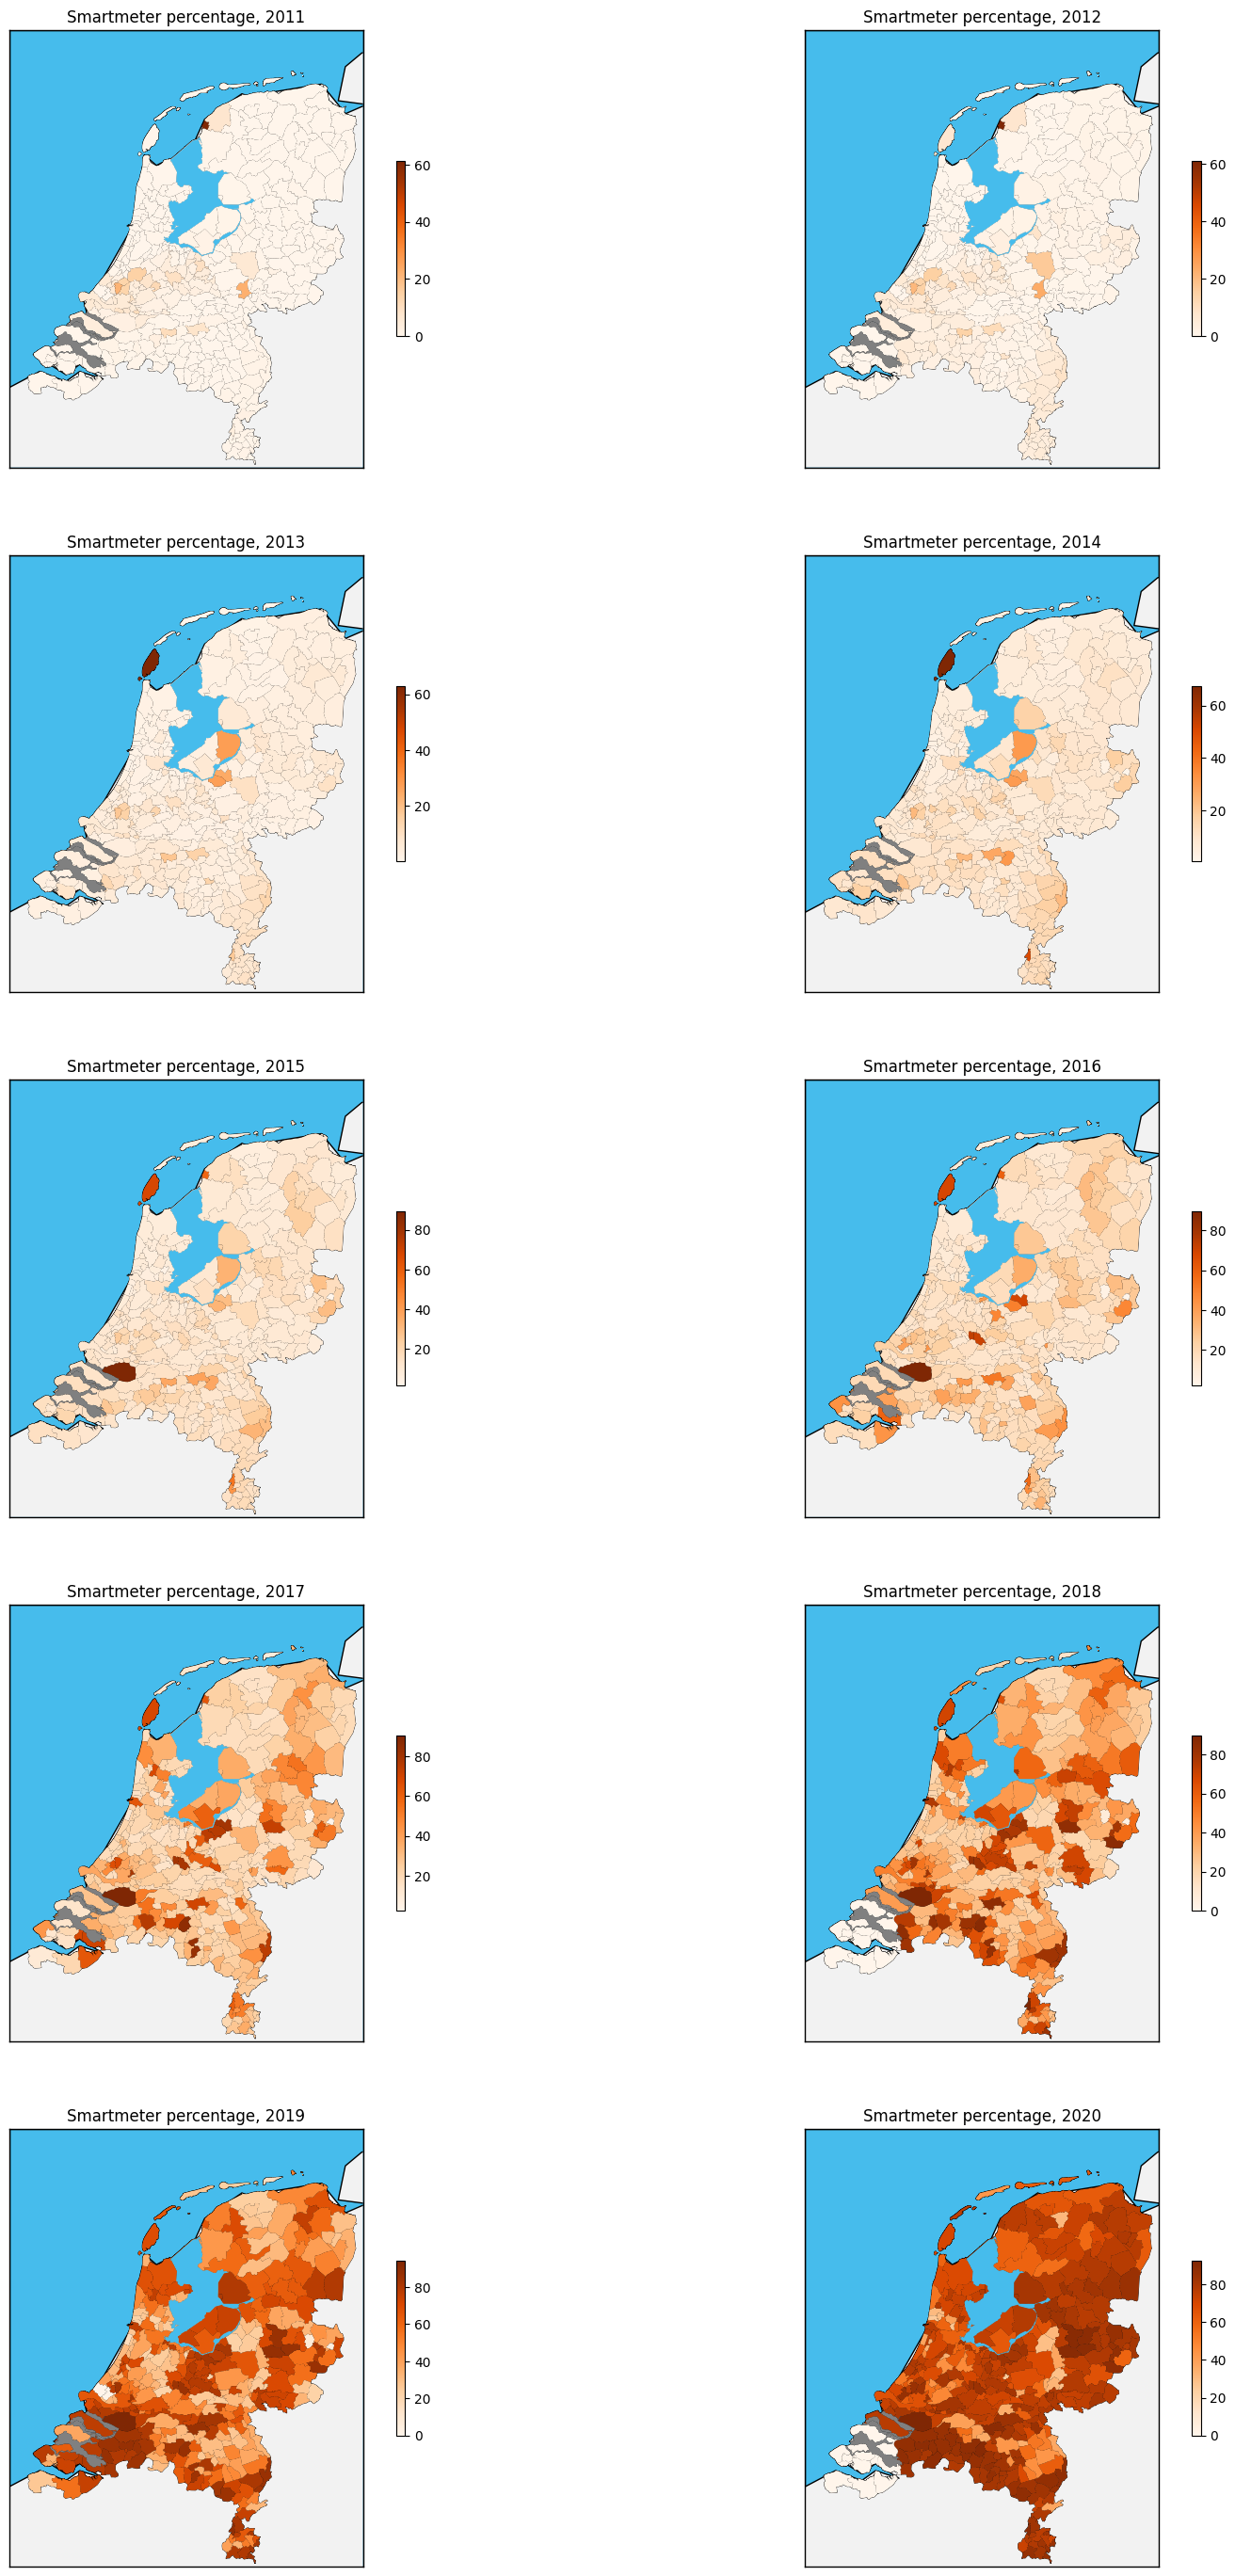

In [32]:
# "param" kun je ook veranderen naar de naam van een andere kolom om iets anders te plotten.
param = 'smartmeter_perc'
f = plt.figure(figsize = (20,35))
gs = gridspec.GridSpec(5,2)

# Onderscheid maken tussen polygons waar data voor is, en polygons waar geen data voor is.
patch1 = combineddf[~combineddf['provincie'].isna()]
patch2 = combineddf[combineddf['provincie'].isna()]
patch3 = combineddf[(alle_jaren_samengevoegd['2018'][1].GID_2=="NLD.6_1")|(alle_jaren_samengevoegd['2018'][1].GID_2=="NLD.6.1_1")] # ijsselmeer & zeeuwse meren

jaren = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

i = 0
x = 0

# Voor elk jaar wordt er een kaart aangemaakt.
for jaar in jaren:
  y2011 = f.add_subplot(gs[i,x]);
  m = Basemap(resolution='l',
              projection='merc',
              lat_0=54.5, lon_0=-4.36,
              llcrnrlon=3.15, llcrnrlat= 50.7, urcrnrlon=7.3, urcrnrlat=53.84, ax=y2011)
  m.drawmapboundary(fill_color='#46bcec') #46bcec
  m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
  m.readshapefile('../../geo_files/gadm41_NLD_2','geometry')
  m.drawcoastlines()

  norm = Normalize()
  cmap = plt.get_cmap('RdBu_r')
  cmap = plt.get_cmap('Oranges')
  pc = PatchCollection(patch1.shapes,zorder=2) # De polygons met een waarde.
  pna = PatchCollection(patch2.shapes, zorder=2) # De polygons zonder waarde.
  pij = PatchCollection(patch3.shapes, zorder=2) # De polygons van het ijsselmeer en de zeeuwse meren.
  patch1[jaar+'_'+param].values[np.isnan(patch1[jaar+'_'+param].values)] = 0

  # Data wordt genormaliseerd (waardes worden getransformeerd naar waardes tussen 0 en 1).
  pc.set_facecolor(cmap(norm(patch1[jaar+'_'+param].values)))
  pna.set_facecolor('gray')
  pij.set_facecolor('#46bcec')
  y2011.add_collection(pc)
  y2011.add_collection(pna)
  y2011.add_collection(pij)
  mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
  mapper.set_array(combineddf[jaar+'_'+param])
  plt.colorbar(mapper, shrink=0.4)
  plt.title('Smartmeter percentage, '+jaar)
  if x < 1:
    x+=1
  else:
    x=0
    i+=1

## Laten we er een GIF van maken!

In [62]:
param = 'smartmeter_perc';de_titel = 'Smartmeter percentage'

# Voor elk jaar maken we een afbeelding.
for i in range(2011,2021):
    year = str(i)
    f = plt.figure(figsize = (10,10))
    gs = gridspec.GridSpec(1,1)

    patch1 = combineddf[~combineddf['provincie'].isna()]
    patch2 = combineddf[combineddf['provincie'].isna()]
    patch3 = combineddf[(alle_jaren_samengevoegd['2018'][1].GID_2=="NLD.6_1")|(alle_jaren_samengevoegd['2018'][1].GID_2=="NLD.6.1_1")] #ijsselmeer & zeeuwse meren

    # Hier wordt de kaart van Nederland samengesteld.
    y2011 = f.add_subplot(gs[0,0]);
    m = Basemap(resolution='l',
                projection='merc',
                lat_0=54.5, lon_0=-4.36,
                llcrnrlon=3.15, llcrnrlat= 50.7, urcrnrlon=7.3, urcrnrlat=53.84, ax=y2011)
    m.drawmapboundary(fill_color='#46bcec') #46bcec
    m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
    m.readshapefile('../../geo_files/gadm41_NLD_2','geometry')
    m.drawcoastlines()

    # Hier vullen we deze kaart met de gewenste (genormaliseerde) waardes.
    norm = Normalize(vmin=0, vmax=7)
    cmap = plt.get_cmap('RdBu_r')
    cmap = plt.get_cmap('Oranges')
    pc = PatchCollection(patch1.shapes,zorder=2) # De polygons met een waarde.
    pna = PatchCollection(patch2.shapes, zorder=2) # De polygons zonder waarde.
    pij = PatchCollection(patch3.shapes, zorder=2) # De polygons van het ijsselmeer en de zeeuwse meren.
    pc.set_facecolor(cmap(norm(np.log10(patch1[year+'_'+param].values+0.00001))))
    pna.set_facecolor('gray')
    pij.set_facecolor('#46bcec')
    y2011.add_collection(pc)
    y2011.add_collection(pna)
    y2011.add_collection(pij)
    mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
    mapper.set_array(combineddf[year+'_'+param])
    plt.colorbar(mapper, shrink=0.4)
    plt.title(de_titel+', '+year)

    # Exporteer de afbeelding.
    my_path = os.path.dirname(os.path.abspath('__file__'))
    results_dir = os.path.join(my_path, '../figs/')
    f.savefig(results_dir + param+'_'+year+'_rdbu.png')
    plt.close(f)


<ipython-input-62-f1e3b7579759>:39: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(mapper, shrink=0.4)
<ipython-input-62-f1e3b7579759>:39: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(mapper, shrink=0.4)
<ipython-input-62-f1e3b7579759>:39: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* 

### We voegen de afbeeldingen samen om er een GIF van te maken.

/content/drive/MyDrive/electricity_dataset/Electricity/../figs/smartmeter_perc_2011_rdbu.png
/content/drive/MyDrive/electricity_dataset/Electricity/../figs/smartmeter_perc_2012_rdbu.png
/content/drive/MyDrive/electricity_dataset/Electricity/../figs/smartmeter_perc_2013_rdbu.png
/content/drive/MyDrive/electricity_dataset/Electricity/../figs/smartmeter_perc_2014_rdbu.png
/content/drive/MyDrive/electricity_dataset/Electricity/../figs/smartmeter_perc_2015_rdbu.png
/content/drive/MyDrive/electricity_dataset/Electricity/../figs/smartmeter_perc_2016_rdbu.png
/content/drive/MyDrive/electricity_dataset/Electricity/../figs/smartmeter_perc_2017_rdbu.png
/content/drive/MyDrive/electricity_dataset/Electricity/../figs/smartmeter_perc_2018_rdbu.png


<ipython-input-79-d198d80d0329>:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(results_dir+file))


/content/drive/MyDrive/electricity_dataset/Electricity/../figs/smartmeter_perc_2019_rdbu.png
/content/drive/MyDrive/electricity_dataset/Electricity/../figs/smartmeter_perc_2020_rdbu.png


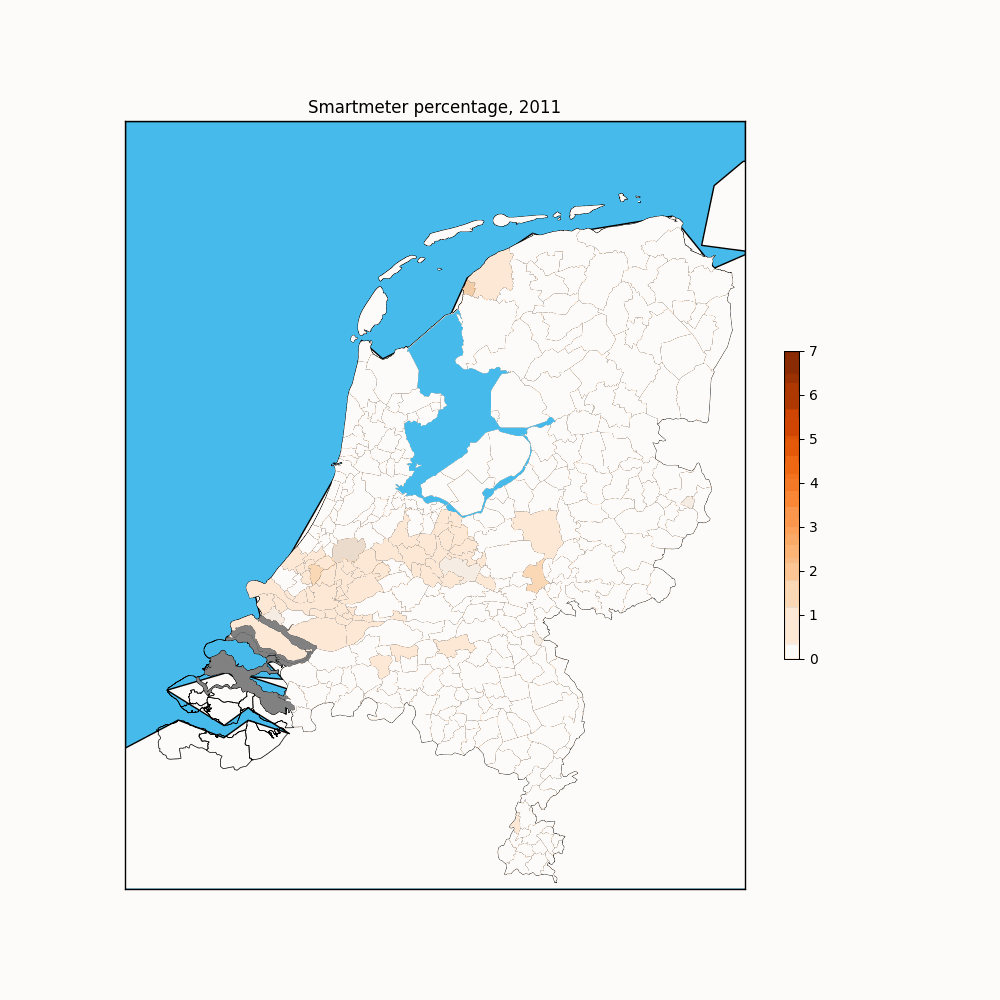

In [79]:
import imageio
import glob
from shutil import copyfile
from IPython.display import Image

# Het pad naar de .png bestanden.
my_path = os.path.dirname(os.path.abspath('__file__'))
results_dir = os.path.join(my_path, '../figs/')

files = np.sort(os.listdir(results_dir))
images = []
# Maak het .gif bestand aan.
for file in files:
    print(results_dir+file)
    images.append(imageio.imread(results_dir+file))

imageio.mimsave('../figs/map_selfprod.gif', images, fps=1)

Image("../figs/map_selfprod.gif")